In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt 
plt.style.use("fivethirtyeight")
sns.set_style({"font.sans-serif": ["simhei", "Arial"]})
%matplotlib inline

In [2]:
# 导入数据
df = pd.read_csv("anjuke.csv")
display(df)
# price：总房价
# community：小区名
# layout：户型
# perprice：每平米单价
# region：区域
# area：面积
# payment：参考月供（这个数据没啥用）
# year：建造年份
# orientation：房屋朝向
# type：房屋类型（这个数据没啥用）
# floor：楼层（这个数据没啥用）
# renovation：装修程度
# elevator：有无电梯

,price,community,layout,perprice,region,area,payment,year,orientation,type,floor,renovation,elevator
0,62.8,金科集美天宸,3室2厅2卫,5981,"市中区－城西－甜城大道,近汉渝大道",105.0,18.84,2019,南北,普通住宅,低层(共28层),毛坯,有
1,57.0,新华维港城,3室2厅2卫,5816,市中区－城西－石羊大道北段222号,98.0,17.10,2020,南北,普通住宅,低层(共26层),精装修,有
2,80.0,金山国际,3室2厅2卫,6557,东兴区－新六中－晨望路8号,122.0,24.00,2010,南北,普通住宅,低层(共28层),精装修,有
3,69.8,万晟城峰景,3室2厅1卫,8982,东兴区－三湾路－汉安大道东段111号,77.7,20.94,2014,南,普通住宅,低层(共29层),精装修,有
4,120.0,西湖郦景,3室2厅2卫,10000,"隆昌市－隆昌城区－隆华路,近万隆路",120.0,36.00,2016,南北,普通住宅,低层(共27层),精装修,有
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1071,75.8,天成国际,3室2厅2卫,8517,东兴区－东兴－兴盛路东段485号,89.0,22.74,2018,南北,普通住宅,中层(共33层),精装修,有
1072,69.8,磐石首创城,3室2厅1卫,7355,资中县－资中城区－资州大道,94.9,20.94,2018,南,普通住宅,高层(共11层),毛坯,有
1073,62.0,和平小区一号街38号院,3室2厅2卫,5000,东兴区－东兴－平安路,124.0,18.60,2005,南北,普通住宅,中层(共6层),简单装修,无
1074,69.8,西浦官邸,3室2厅2卫,5917,市中区－城西－双苏路6号,118.0,20.94,2013,南北,普通住宅,中层(共33层),精装修,有


In [3]:
# 查看是否有空缺值
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1076 entries, 0 to 1075
Data columns (total 13 columns):
price          1076 non-null float64
community      1076 non-null object
layout         1076 non-null object
perprice       1076 non-null int64
region         1076 non-null object
area           1076 non-null float64
payment        1076 non-null float64
year           1076 non-null int64
orientation    1076 non-null object
type           1076 non-null object
floor          1076 non-null object
renovation     1076 non-null object
elevator       1076 non-null object
dtypes: float64(3), int64(2), object(8)
memory usage: 109.4+ KB


In [4]:
# 更新区域信息
df["region"] = df["region"].str.split("－", 0).str[0]
display(df)

,price,community,layout,perprice,region,area,payment,year,orientation,type,floor,renovation,elevator
0,62.8,金科集美天宸,3室2厅2卫,5981,市中区,105.0,18.84,2019,南北,普通住宅,低层(共28层),毛坯,有
1,57.0,新华维港城,3室2厅2卫,5816,市中区,98.0,17.10,2020,南北,普通住宅,低层(共26层),精装修,有
2,80.0,金山国际,3室2厅2卫,6557,东兴区,122.0,24.00,2010,南北,普通住宅,低层(共28层),精装修,有
3,69.8,万晟城峰景,3室2厅1卫,8982,东兴区,77.7,20.94,2014,南,普通住宅,低层(共29层),精装修,有
4,120.0,西湖郦景,3室2厅2卫,10000,隆昌市,120.0,36.00,2016,南北,普通住宅,低层(共27层),精装修,有
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1071,75.8,天成国际,3室2厅2卫,8517,东兴区,89.0,22.74,2018,南北,普通住宅,中层(共33层),精装修,有
1072,69.8,磐石首创城,3室2厅1卫,7355,资中县,94.9,20.94,2018,南,普通住宅,高层(共11层),毛坯,有
1073,62.0,和平小区一号街38号院,3室2厅2卫,5000,东兴区,124.0,18.60,2005,南北,普通住宅,中层(共6层),简单装修,无
1074,69.8,西浦官邸,3室2厅2卫,5917,市中区,118.0,20.94,2013,南北,普通住宅,中层(共33层),精装修,有


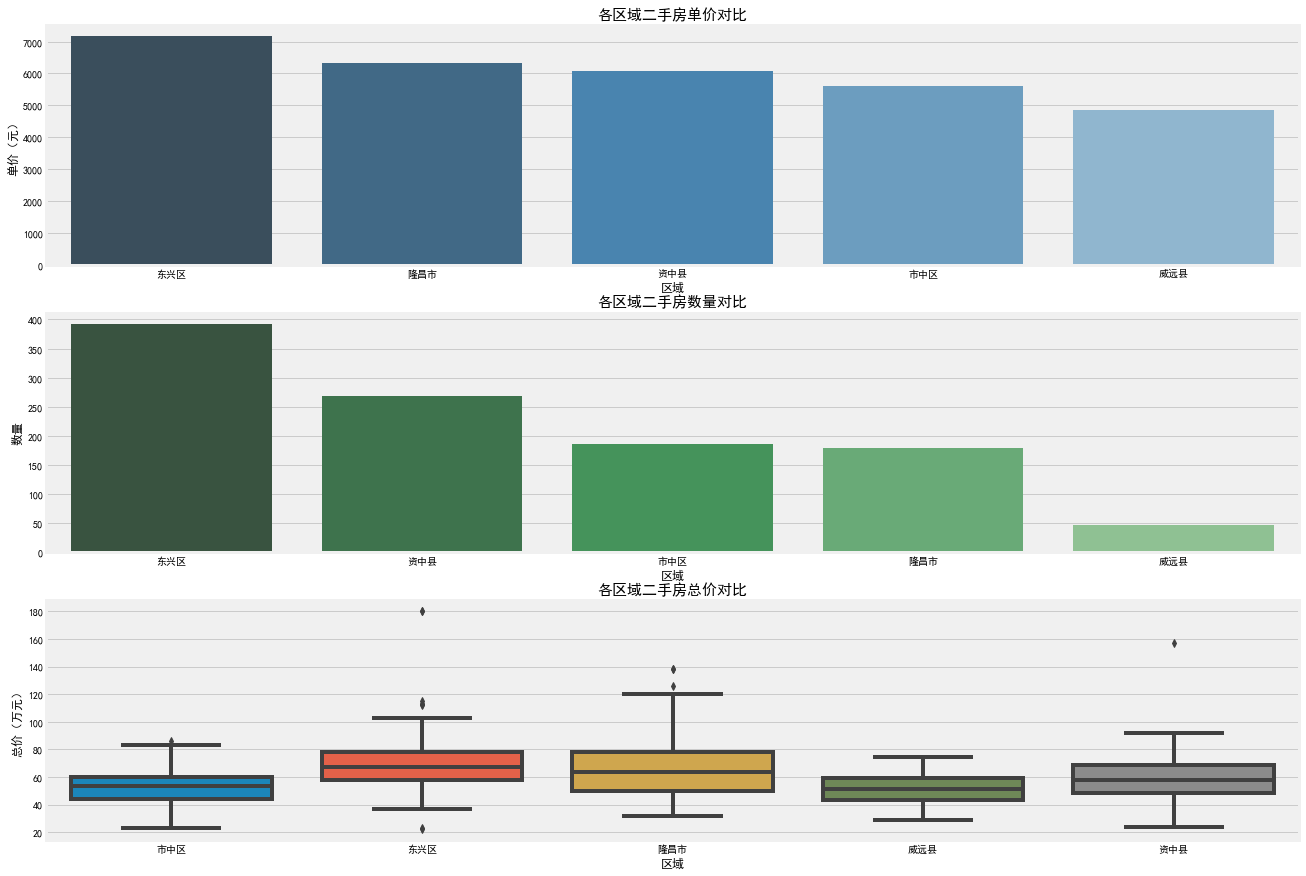

In [5]:
# 对二手房的区域分组，并对比数量和每平米的房价
house_count = df.groupby("region")["price"].count().sort_values(ascending=False).to_frame().reset_index()
house_mean = df.groupby("region")["perprice"].mean().sort_values(ascending=False).to_frame().reset_index()

f, [ax1, ax2, ax3] = plt.subplots(3, 1, figsize=(20, 15))
sns.barplot(x="region", y="perprice", palette="Blues_d", data=house_mean, ax=ax1)
ax1.set_title("各区域二手房单价对比", fontsize=15)
ax1.set_xlabel("区域", fontsize=12)
ax1.set_ylabel("单价（元）", fontsize=12)

sns.barplot(x="region", y="price", palette="Greens_d", data=house_count, ax=ax2)
ax2.set_title("各区域二手房数量对比", fontsize=15)
ax2.set_xlabel("区域", fontsize=12)
ax2.set_ylabel("数量", fontsize=12)

sns.boxplot(x="region", y="price", data=df, ax=ax3)
ax3.set_title("各区域二手房总价对比", fontsize=15)
ax3.set_xlabel("区域", fontsize=12)
ax3.set_ylabel("总价（万）", fontsize=12)

plt.show()

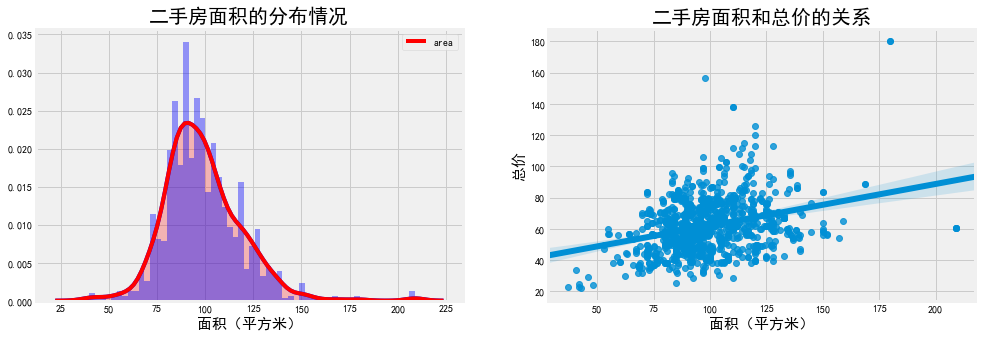

In [6]:
# 对二手房的面积进行分析
f, [ax1, ax2] = plt.subplots(1, 2, figsize=(15, 5))

# 建立二手房面积的分布情况
sns.distplot(df["area"], bins=60, ax=ax1, color="b")  # bins 表示直方的数量
sns.kdeplot(df["area"], shade=True, ax=ax1, color="r")  # sahde 表示阴影
ax1.set_title("二手房面积的分布情况", fontsize=20)
ax1.set_xlabel("面积（平方米）", fontsize=15)

# 建立二手房面积和总价的关系
sns.regplot(x="area", y="price", data=df, ax=ax2)
ax2.set_title("二手房面积和总价的关系", fontsize=20)
ax2.set_xlabel("面积（平方米）", fontsize=15)
ax2.set_ylabel("总价", fontsize=15)

plt.show()

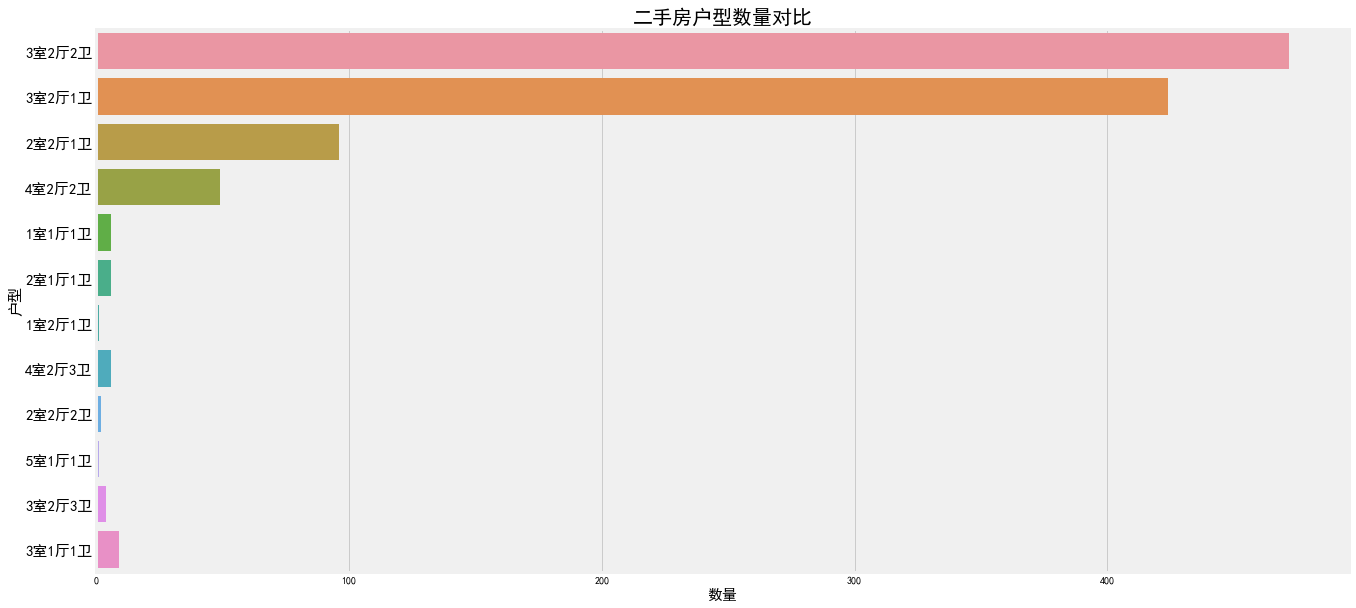

In [7]:
# 对二手房户型进行分析
f, ax1 = plt.subplots(figsize=(20, 10))
sns.countplot(y="layout", data=df, ax=ax1)
ax1.set_title("二手房户型数量对比", fontsize=20)
ax1.set_xlabel("数量", fontsize=15)
ax1.set_ylabel("户型", fontsize=15)
ax1.set_yticklabels(ax1.get_yticklabels(), fontsize=15)

plt.show()

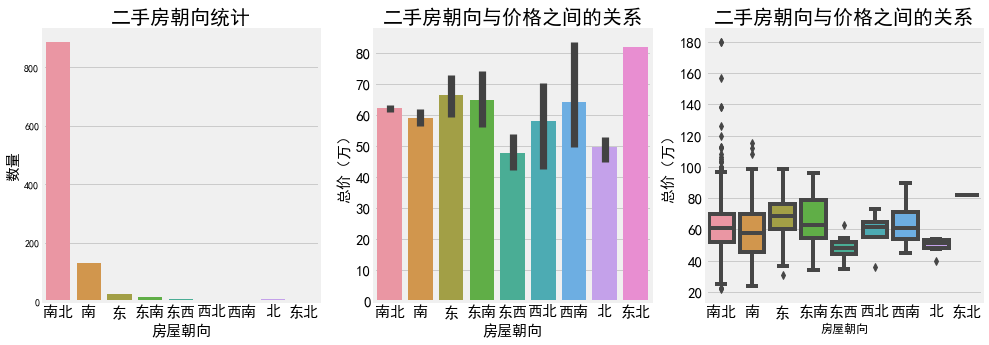

In [8]:
# 对二手房的房屋朝向进行分析
# orientation = df["orientation"].value_counts().to_frame()  # 统计每种朝向的数量
# df["orientation"].value_counts()  # 统计每种朝向的数量
f, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(15, 5))
sns.countplot(x="orientation", data=df, ax=ax1)
ax1.set_title("二手房朝向统计", fontsize=20)
ax1.set_xlabel("房屋朝向", fontsize=15)
ax1.set_xticklabels(ax1.get_xticklabels(), fontsize=15)
ax1.set_ylabel("数量", fontsize=15)

sns.barplot(x="orientation", y="price", data=df, ax=ax2)
ax2.set_title("二手房朝向与价格之间的关系", fontsize=20)
ax2.set_xlabel("房屋朝向", fontsize=15)
ax2.tick_params(axis='x', labelsize=15)
ax2.set_ylabel("总价（万）", fontsize=15)
ax2.tick_params(axis='y', labelsize=15)

sns.boxplot(x="orientation", y="price", data=df, ax=ax3)
ax3.set_title("二手房朝向与价格之间的关系", fontsize=20)
ax3.set_xlabel("房屋朝向")
ax3.set_ylabel("总价（万）", fontsize=15)
ax3.tick_params(axis="x", labelsize=15)
ax3.tick_params(axis="y", labelsize=15)

plt.show()

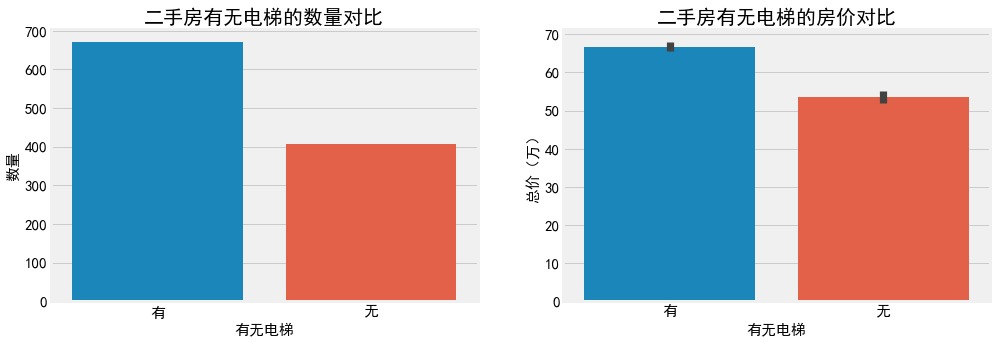

有    670
无    406
Name: elevator, dtype: int64

In [9]:
# 对二手房有无电梯的特征进行分析
# df["elevator"].value_counts()
f, [ax1, ax2] = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(x="elevator", data=df, ax=ax1)
ax1.set_title("二手房有无电梯的数量对比", fontsize=20)
ax1.set_xlabel("有无电梯", fontsize=15)
ax1.set_ylabel("数量", fontsize=15)
ax1.tick_params(axis="x", labelsize=15)
ax1.tick_params(axis="y", labelsize=15)

sns.barplot(x="elevator", y="price", data=df, ax=ax2)
ax2.set_title("二手房有无电梯的房价对比", fontsize=20)
ax2.set_xlabel("有无电梯", fontsize=15)
ax2.set_ylabel("总价（万）", fontsize=15)
ax2.tick_params(axis="x", labelsize=15)
ax2.tick_params(axis="y", labelsize=15)

plt.show()
df["elevator"].value_counts()

,price,community,layout,perprice,region,area,payment,year,orientation,type,floor,renovation,elevator
0,62.8,金科集美天宸,3室2厅2卫,5981,市中区,105.0,18.84,2019,南北,普通住宅,低层(共28层),毛坯,有
1,57.0,新华维港城,3室2厅2卫,5816,市中区,98.0,17.10,2020,南北,普通住宅,低层(共26层),精装,有
2,80.0,金山国际,3室2厅2卫,6557,东兴区,122.0,24.00,2010,南北,普通住宅,低层(共28层),精装,有
3,69.8,万晟城峰景,3室2厅1卫,8982,东兴区,77.7,20.94,2014,南,普通住宅,低层(共29层),精装,有
4,120.0,西湖郦景,3室2厅2卫,10000,隆昌市,120.0,36.00,2016,南北,普通住宅,低层(共27层),精装,有
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1071,75.8,天成国际,3室2厅2卫,8517,东兴区,89.0,22.74,2018,南北,普通住宅,中层(共33层),精装,有
1072,69.8,磐石首创城,3室2厅1卫,7355,资中县,94.9,20.94,2018,南,普通住宅,高层(共11层),毛坯,有
1073,62.0,和平小区一号街38号院,3室2厅2卫,5000,东兴区,124.0,18.60,2005,南北,普通住宅,中层(共6层),简装,无
1074,69.8,西浦官邸,3室2厅2卫,5917,市中区,118.0,20.94,2013,南北,普通住宅,中层(共33层),精装,有


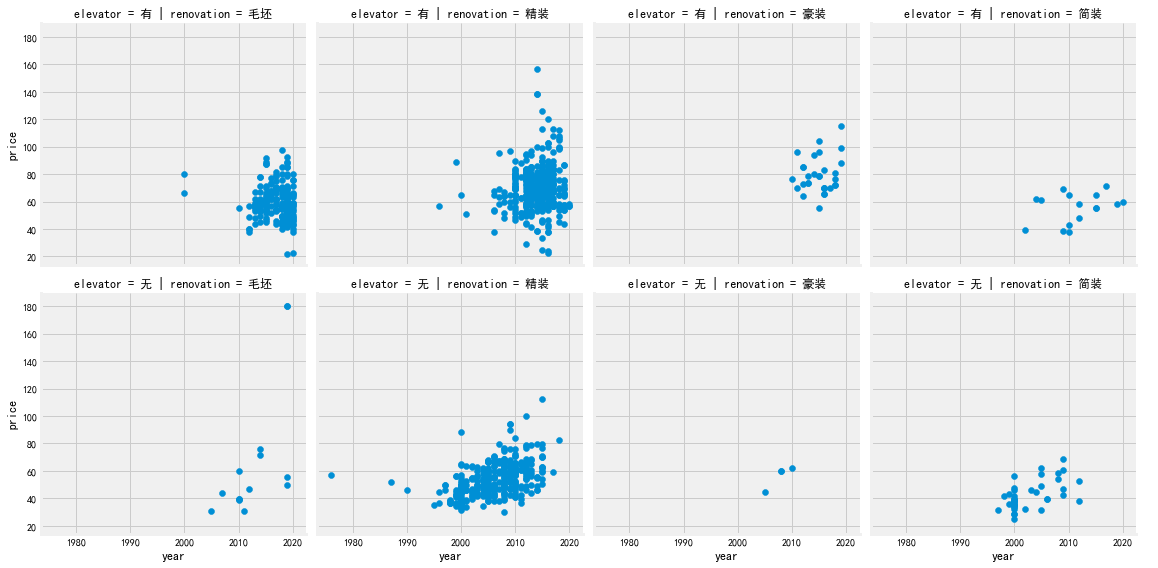

In [10]:
# 对二手房的装修程度、有无电梯、建造年份进行分析
# 这里犯了一个巨大的错误（没有指定列，不指定列的话就是对所有列进行操作），我说我怎么后面画出来的图很怪 $_$
# df["renovation"].value_counts()  # 先看一下有几种装修
# df.loc[df["renovation"] == "简单装修"] = "简装"
# df.loc[df["renovation"] == "精装修"] = "精装"
# df.loc[df["renovation"] == "豪华装修"] = "豪装"

df.loc[df["renovation"] == "简单装修", "renovation"] = "简装"
df.loc[df["renovation"] == "精装修", "renovation"] = "精装"
df.loc[df["renovation"] == "豪华装修", "renovation"] = "豪装"
df["year"].astype("int32")
# display(df)


grid = sns.FacetGrid(df, row='elevator', col='renovation', palette='seismic', height=4)
grid.map(plt.scatter, 'year', 'price')
grid.add_legend()